In [2]:
import pandas as pd
import numpy as np
import os
import glob
folders_1 = os.listdir('data/금융사기용의자의 연령대별 지역데이터')
folders_2 = os.listdir('data/금융사기피해자의 연령대별 지역데이터')

def make_csv(folders,folderpath):
    with open(folderpath[:-1]+'.csv', 'w',encoding='UTF-8') as outfile:
        for filename in folders:
            with open(folderpath+filename, encoding='UTF-8') as file:        
                outfile.write(file.read())


make_csv(folders_1,"data/금융사기용의자의 연령대별 지역데이터/")
df_suspect_origin = pd.read_csv('./data/금융사기용의자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)
make_csv(folders_2,'data/금융사기피해자의 연령대별 지역데이터/')
df_victim_origin = pd.read_csv('./data/금융사기피해자의 연령대별 지역데이터.csv',names=['고유번호', '생년구간', '광역시도명', '법정시군구명', '등록일시'],index_col=0)

In [4]:
a = list(df_victim_origin['생년구간'].unique()) #2090-2100 2070-2080 => 각각 1개 5개 제외
a.remove ('2090-2100')
a.remove('2070-2080')
a= sorted(a)


b = list(df_suspect_origin['생년구간'].unique()) # 2080-2090 => 1개 제외
b.remove('2080-2090')
b = sorted(b)

DF = [[]for _ in range(len(a))]
for i in range (0, len(a)):
    DF[i].append(a[i])


suspect_DF = pd.DataFrame(columns=['생년구간'], data=DF)
victim_DF = pd.DataFrame(columns=['생년구간'], data=DF)
def return_cnt(dataframe, row):
    temp = dataframe[(dataframe['생년구간']==row['생년구간'])]
    return temp['생년구간'].count()

suspect_DF['발생건수'] = suspect_DF.apply(lambda x: return_cnt(df_suspect_origin,x),axis=1)
victim_DF['발생건수'] = victim_DF.apply(lambda x: return_cnt(df_victim_origin,x),axis=1)

In [5]:
suspect_DF

,생년구간,발생건수
0,1900-1910,5
1,1910-1920,6
2,1920-1930,0
3,1930-1940,91
4,1940-1950,49
5,1950-1960,188
6,1960-1970,842
7,1970-1980,1602
8,1980-1990,2984
9,1990-2000,12344


In [6]:
victim_DF

,생년구간,발생건수
0,1900-1910,67
1,1910-1920,72
2,1920-1930,1
3,1930-1940,47
4,1940-1950,294
5,1950-1960,1049
6,1960-1970,3865
7,1970-1980,13807
8,1980-1990,38274
9,1990-2000,72435


# 초기분석

# 1. 생년구간별 피해자 피의자 발생 수 막대그래프
## 용의자 피해자 모두 거의 비슷한 분포를 보임
### 1. 용의자 피해자 모두 2000~2010년의 생년구간이 가장많음
### 2. 연령대가 낮은 구간에서 용의자와 피해자가 많다. -> 금융사기는 젊은층에서 저지르고, 당한다.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

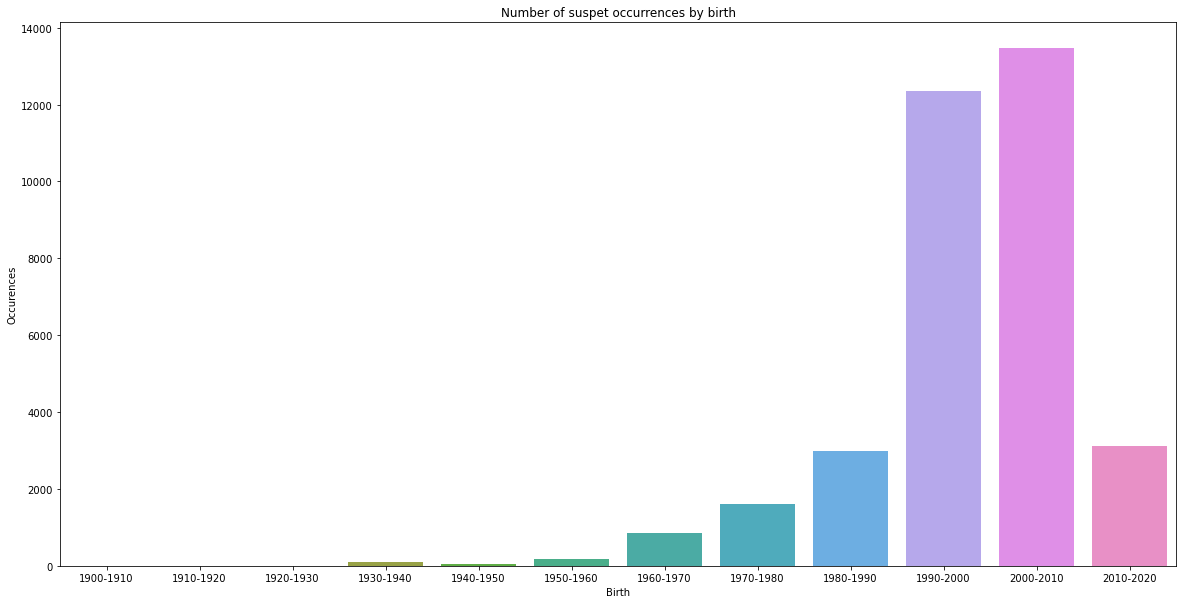

In [8]:
plt.figure(figsize=(20, 10))
sns.barplot(x='생년구간', y='발생건수', data=suspect_DF)
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('Number of suspet occurrences by birth')
plt.show()

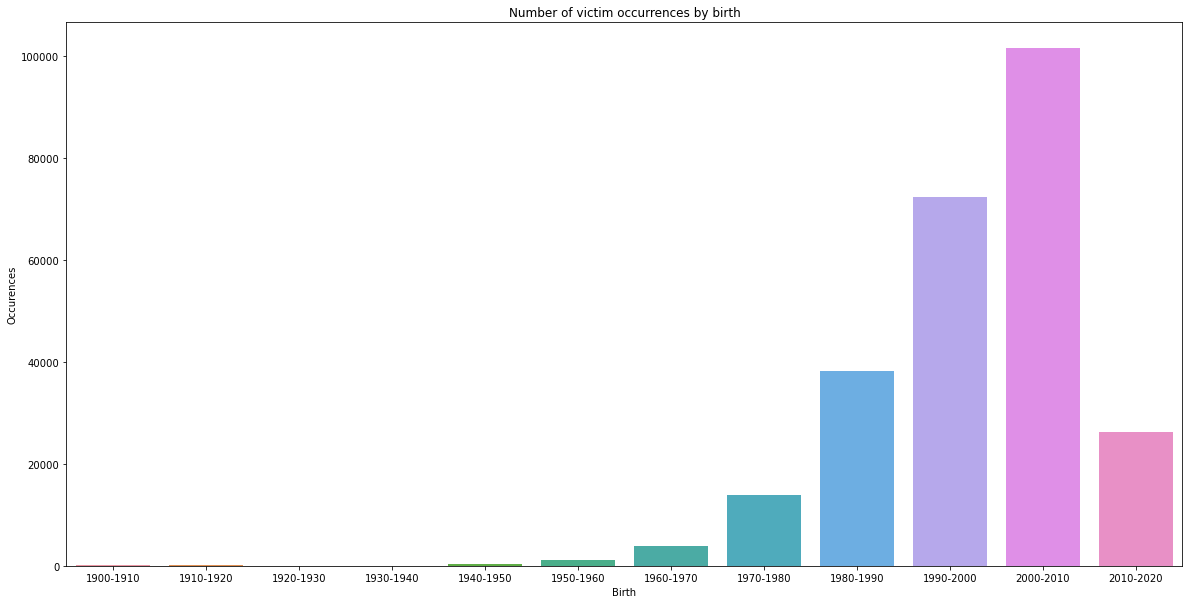

In [9]:
plt.figure(figsize=(20, 10))
sns.barplot(x='생년구간', y='발생건수', data=victim_DF)
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('Number of victim occurrences by birth')
plt.show()

# 2. 생년구간과 피의자, 피해자 발생건수의 상관관계 
## 생년구간의 중앙값과 발생건수 (temp에 복사해서 생년구간 중앙값 생성) 상관관계 비교
## 결과: 생년과 발생건수는 양의 상관관계를 가진다.

In [10]:
temp_suspect=suspect_DF.copy()
temp_victim=victim_DF.copy()

In [11]:
def change_birth(row):
    return int(row[0:4])+5
temp_suspect['생년구간']=temp_suspect['생년구간'].apply(change_birth)
temp_victim['생년구간']=temp_victim['생년구간'].apply(change_birth)

## 1. 피의자 발생건수 & 나이
### 상관관계 0.67로 상관관계가 있다고 보는편이 맞다.

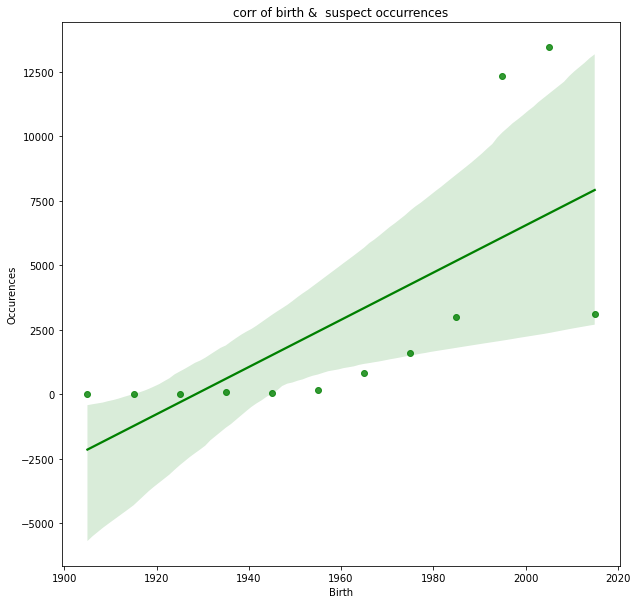

In [12]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=temp_suspect['생년구간'], y=temp_suspect['발생건수'], fit_reg=True, color='g')
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('corr of birth &  suspect occurrences')
plt.show()

In [25]:
from scipy import stats

In [26]:
print(stats.pearsonr(temp_suspect['생년구간'], temp_suspect['발생건수']))

(0.6702537825895382, 0.024019549278497147)


## 2. 피해자
### 상관관계 0.67로 상관관계가 있다고 보는편이 맞다.

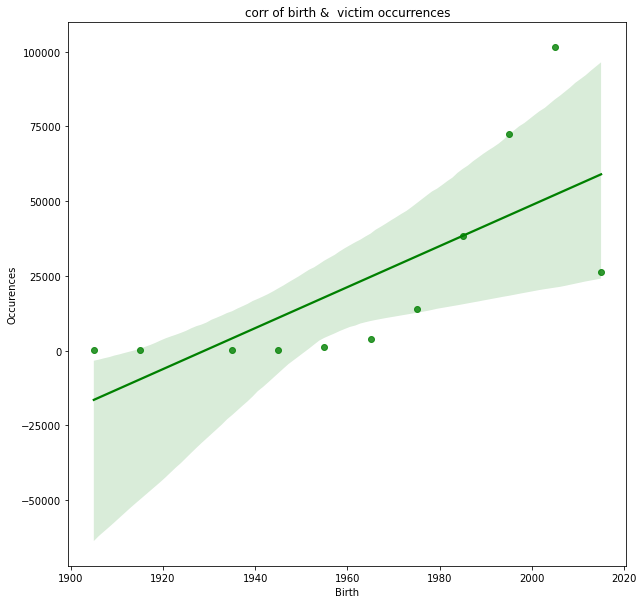

In [29]:
fig=plt.figure(figsize=(10,10))
sns.regplot(x=temp_victim['생년구간'], y=temp_victim['발생건수'], fit_reg=True, color='g')
plt.xlabel('Birth')
plt.ylabel('Occurences')
plt.title('corr of birth &  victim occurrences')
plt.show()

In [30]:
print(stats.pearsonr(temp_victim['생년구간'], temp_victim['발생건수']))

(0.7163211884360393, 0.013145143872812272)


# 준비과정
## 생년구간과의 match만약 생년월일을 나이로 바꾸었을때
## 만나이는 계산불가능 따라서 일반 나이를 따름
## 2023년 기준으로
## 1. 13~22
## 2. 23~32 이런식으로 나이가 바뀜

## 따라서 칼럼을 이어붙이는 기준에서 걸침
## ex> 23 ~ 32는 15 ~ 29에도 포함되고 30 ~ 49에도 포함됨, 따라서 그 나이구간의 중앙값을 그 나이라고 가정하고 컬럼을 이어붙인다. 

In [13]:
def cut1(row):
    return 2023-int(row[0:4])+5

In [14]:
suspect_DF['생년구간new']=suspect_DF['생년구간'].apply(cut1)
victim_DF['생년구간new']=victim_DF['생년구간'].apply(cut1)

In [15]:
suspect_DF

,생년구간,발생건수,생년구간new
0,1900-1910,5,128
1,1910-1920,6,118
2,1920-1930,0,108
3,1930-1940,91,98
4,1940-1950,49,88
5,1950-1960,188,78
6,1960-1970,842,68
7,1970-1980,1602,58
8,1980-1990,2984,48
9,1990-2000,12344,38


In [16]:
victim_DF

,생년구간,발생건수,생년구간new
0,1900-1910,67,128
1,1910-1920,72,118
2,1920-1930,1,108
3,1930-1940,47,98
4,1940-1950,294,88
5,1950-1960,1049,78
6,1960-1970,3865,68
7,1970-1980,13807,58
8,1980-1990,38274,48
9,1990-2000,72435,38


# 1. 내외국인 국제이동
## 1. 내국인
### 1 총이동
### 2 입국자
### 3 출국자
### 4 국제순이동

In [17]:
move=pd.read_csv("./데이터/내외국인_성_연령별_국제이동_월간__연간__20230508232143(2021).csv", encoding='cp949')

In [18]:
move

,내외국인별,성별,연령별,총이동,입국자,출국자,국제순이동
0,내국인,계,0세,3508,1307,2201,-894
1,내국인,계,1세,4218,1664,2554,-890
2,내국인,계,2세,3657,1632,2025,-393
3,내국인,계,3세,3648,1556,2092,-536
4,내국인,계,4세,3604,1489,2115,-626
...,...,...,...,...,...,...,...
167,외국인,계,81세,216,112,104,8
168,외국인,계,82세,186,110,76,34
169,외국인,계,83세,149,78,71,7
170,외국인,계,84세,113,70,43,27


In [19]:
def make_age(row):
    try:
        row=row.replace("세",'')
        return int(row)
    except:
        row=row.replace("이상",'')
        return int(row)
move['연령별']=move['연령별'].apply(make_age)

In [20]:
move

,내외국인별,성별,연령별,총이동,입국자,출국자,국제순이동
0,내국인,계,0,3508,1307,2201,-894
1,내국인,계,1,4218,1664,2554,-890
2,내국인,계,2,3657,1632,2025,-393
3,내국인,계,3,3648,1556,2092,-536
4,내국인,계,4,3604,1489,2115,-626
...,...,...,...,...,...,...,...
167,외국인,계,81,216,112,104,8
168,외국인,계,82,186,110,76,34
169,외국인,계,83,149,78,71,7
170,외국인,계,84,113,70,43,27


In [21]:
def make_move(row, move, option1, option2):
    if row.생년구간new >= 85:
        df=move[(move['내외국인별']==option1)&(move['연령별']==85)]
        return df[option2].values[0]
    else:
        df=move[(move['내외국인별']==option1)&(move['연령별']==row.생년구간new)]
        return df[option2].values[0]

In [22]:
suspect_DF['내국인총이동']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','총이동'),axis=1)
suspect_DF['내국인입국자']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','입국자'),axis=1)
suspect_DF['내국인출국자']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','출국자'),axis=1)
suspect_DF['내국인국제순이동']=suspect_DF.apply(lambda x: make_move(x,move,'내국인','국제순이동'),axis=1)
suspect_DF['외국인총이동']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','총이동'),axis=1)
suspect_DF['외국인입국자']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','입국자'),axis=1)
suspect_DF['외국인출국자']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','출국자'),axis=1)
suspect_DF['외국인국제순이동']=suspect_DF.apply(lambda x: make_move(x,move,'외국인','국제순이동'),axis=1)

In [23]:
victim_DF['내국인총이동']=victim_DF.apply(lambda x: make_move(x,move,'내국인','총이동'),axis=1)
victim_DF['내국인입국자']=victim_DF.apply(lambda x: make_move(x,move,'내국인','입국자'),axis=1)
victim_DF['내국인출국자']=victim_DF.apply(lambda x: make_move(x,move,'내국인','출국자'),axis=1)
victim_DF['내국인국제순이동']=victim_DF.apply(lambda x: make_move(x,move,'내국인','국제순이동'),axis=1)
victim_DF['외국인총이동']=victim_DF.apply(lambda x: make_move(x,move,'외국인','총이동'),axis=1)
victim_DF['외국인입국자']=victim_DF.apply(lambda x: make_move(x,move,'외국인','입국자'),axis=1)
victim_DF['외국인출국자']=victim_DF.apply(lambda x: make_move(x,move,'외국인','출국자'),axis=1)
victim_DF['외국인국제순이동']=victim_DF.apply(lambda x: make_move(x,move,'외국인','국제순이동'),axis=1)

In [24]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동
발생건수,1.000000,-0.684439,0.898552,0.857960,0.931502,-0.352298,0.816621,0.593509,0.873254,-0.387146
생년구간new,-0.684439,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069
내국인총이동,0.898552,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707
내국인입국자,0.857960,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922
내국인출국자,0.931502,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097
내국인국제순이동,-0.352298,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747
외국인총이동,0.816621,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770
외국인입국자,0.593509,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445
외국인출국자,0.873254,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072
외국인국제순이동,-0.387146,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000


In [25]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동
발생건수,1.000000,-0.729635,0.936317,0.900237,0.964383,-0.300686,0.863090,0.650585,0.901244,-0.356750
생년구간new,-0.729635,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069
내국인총이동,0.936317,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707
내국인입국자,0.900237,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922
내국인출국자,0.964383,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097
내국인국제순이동,-0.300686,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747
외국인총이동,0.863090,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770
외국인입국자,0.650585,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445
외국인출국자,0.901244,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072
외국인국제순이동,-0.356750,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000


# 2. 연령별 소득(2021)
## 1. 평균소득
## 2. 중위소득

In [26]:
earn=pd.read_csv("./데이터/산업대분류별_연령별_소득_20230508235752(2021).csv", encoding='cp949')

In [27]:
def change_age(row):
    return int(row[0:2])
earn['연령대별']=earn['연령대별'].apply(change_age)

In [28]:
earn

,산업대분류별,연령대별,평균소득,중위소득
0,총 계,19,89,56
1,총 계,20,180,189
2,총 계,25,271,250
3,총 계,30,333,300
4,총 계,35,388,336
5,총 계,40,413,343
6,총 계,45,414,306
7,총 계,50,407,273
8,총 계,55,365,240
9,총 계,60,273,197


In [29]:
tempdf=suspect_DF.copy()

In [30]:
def synchronization(row):
    if row >= 65:
        return 65
    elif row >= 60:
        return 60
    elif row >= 55:
        return 55
    elif row >= 50:
        return 50
    elif row >= 45:
        return 45
    elif row >= 40:
        return 40
    elif row >= 35:
        return 35
    elif row >= 30:
        return 30
    elif row >= 25:
        return 25
    elif row >= 20:
        return 20
    else:
        return 19
tempdf['생년구간new']=tempdf['생년구간new'].apply(synchronization)

In [31]:
def make_earn(row,earn,option):
    df=earn[earn['연령대별']==row.생년구간new]
    return df[option].values[0]

In [32]:
suspect_DF['평균소득']=tempdf.apply(lambda x: make_earn(x, earn, '평균소득'),axis=1)
suspect_DF['중위소득']=tempdf.apply(lambda x: make_earn(x, earn, '중위소득'),axis=1)
victim_DF['평균소득']=tempdf.apply(lambda x: make_earn(x, earn, '평균소득'),axis=1)
victim_DF['중위소득']=tempdf.apply(lambda x: make_earn(x, earn, '평균소득'),axis=1)

In [33]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득
발생건수,1.000000,-0.684439,0.898552,0.857960,0.931502,-0.352298,0.816621,0.593509,0.873254,-0.387146,0.498138,0.680848
생년구간new,-0.684439,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.441624
내국인총이동,0.898552,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.654828
내국인입국자,0.857960,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.641071
내국인출국자,0.931502,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.662886
내국인국제순이동,-0.352298,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,-0.087712
외국인총이동,0.816621,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.614253
외국인입국자,0.593509,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.267559
외국인출국자,0.873254,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.823436
외국인국제순이동,-0.387146,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.693636


In [34]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득
발생건수,1.000000,-0.729635,0.936317,0.900237,0.964383,-0.300686,0.863090,0.650585,0.901244,-0.356750,0.531027,0.531027
생년구간new,-0.729635,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.374318
내국인총이동,0.936317,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.534360
내국인입국자,0.900237,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.536706
내국인출국자,0.964383,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.527251
내국인국제순이동,-0.300686,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,0.073399
외국인총이동,0.863090,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.543638
외국인입국자,0.650585,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.222811
외국인출국자,0.901244,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.741802
외국인국제순이동,-0.356750,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.645370


# 3. 퇴직연금제도가입
## 1. 가입 대상 근로자 수 (명)	
## 2 가입 근로자 수 (명)	
## 3 가입률 (%)

In [35]:
pension=pd.read_csv("./데이터/성별_연령별_퇴직연금제도_가입률_20230508233640(2021).csv",encoding='cp949')

In [36]:
pension

,연령별(1),가입 대상 근로자 수 (명),가입 근로자 수 (명),가입률 (%)
0,20세 미만,17645,4007,22.7
1,20 - 24세,292172,117350,40.2
2,25 - 29세,1103887,592129,53.6
3,30 - 34세,1328747,805084,60.6
4,35 - 39세,1453232,891890,61.4
5,40 - 44세,1567695,927022,59.1
6,45 - 49세,1582980,879746,55.6
7,50 - 54세,1606672,863578,53.7
8,55 - 59세,1278972,650797,50.9
9,60 - 64세,916070,373195,40.7


In [37]:
def change_age2(row):
    if('미만' in row):
        return 19
    else:
        return int(row[0:2])
pension['연령별(1)']=pension['연령별(1)'].apply(change_age2)

In [38]:
pension

,연령별(1),가입 대상 근로자 수 (명),가입 근로자 수 (명),가입률 (%)
0,19,17645,4007,22.7
1,20,292172,117350,40.2
2,25,1103887,592129,53.6
3,30,1328747,805084,60.6
4,35,1453232,891890,61.4
5,40,1567695,927022,59.1
6,45,1582980,879746,55.6
7,50,1606672,863578,53.7
8,55,1278972,650797,50.9
9,60,916070,373195,40.7


### tempdf랑 연령 형식 똑같음

In [39]:
def make_pension(row, pension, option):
    df = pension[pension['연령별(1)']==row.생년구간new]
    return df[option].values[0]

In [40]:
suspect_DF['퇴직연금가입대상근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 대상 근로자 수 (명)'),axis=1)
suspect_DF['퇴직연금가입근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 근로자 수 (명)'),axis=1)
suspect_DF['퇴직연금제도가입률']=tempdf.apply(lambda x: make_pension(x, pension, '가입률 (%)'),axis=1)
victim_DF['퇴직연금가입대상근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 대상 근로자 수 (명)'),axis=1)
victim_DF['퇴직연금가입근로자수']=tempdf.apply(lambda x: make_pension(x, pension, '가입 근로자 수 (명)'),axis=1)
victim_DF['퇴직연금제도가입률']=tempdf.apply(lambda x: make_pension(x, pension, '가입률 (%)'),axis=1)

In [41]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률
발생건수,1.000000,-0.684439,0.898552,0.857960,0.931502,-0.352298,0.816621,0.593509,0.873254,-0.387146,0.498138,0.680848,0.398015,0.602171,0.718734
생년구간new,-0.684439,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.441624,-0.117512,-0.395088,-0.462550
내국인총이동,0.898552,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.654828,0.318800,0.594372,0.677360
내국인입국자,0.857960,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.641071,0.299442,0.585767,0.658006
내국인출국자,0.931502,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.662886,0.335487,0.597772,0.690859
내국인국제순이동,-0.352298,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,-0.087712,-0.177927,-0.038146,-0.145449
외국인총이동,0.816621,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.614253,0.302741,0.561712,0.663640
외국인입국자,0.593509,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.267559,-0.091560,0.217788,0.306379
외국인출국자,0.873254,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.823436,0.613920,0.778040,0.873522
외국인국제순이동,-0.387146,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.693636,-0.844541,-0.694791,-0.710466


In [42]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률
발생건수,1.000000,-0.729635,0.936317,0.900237,0.964383,-0.300686,0.863090,0.650585,0.901244,-0.356750,0.531027,0.531027,0.417961,0.625687,0.734608
생년구간new,-0.729635,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.374318,-0.117512,-0.395088,-0.462550
내국인총이동,0.936317,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.534360,0.318800,0.594372,0.677360
내국인입국자,0.900237,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.536706,0.299442,0.585767,0.658006
내국인출국자,0.964383,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.527251,0.335487,0.597772,0.690859
내국인국제순이동,-0.300686,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,0.073399,-0.177927,-0.038146,-0.145449
외국인총이동,0.863090,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.543638,0.302741,0.561712,0.663640
외국인입국자,0.650585,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.222811,-0.091560,0.217788,0.306379
외국인출국자,0.901244,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.741802,0.613920,0.778040,0.873522
외국인국제순이동,-0.356750,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.645370,-0.844541,-0.694791,-0.710466


# 4. 구직급여 신청자수(2022 4분기) 평균

In [43]:
job_search=pd.read_csv("./데이터/연령별_구직급여_신청자수_분기__20230508232810(2022).csv", encoding='cp949')

In [44]:
job_search['구직급여신청자수']=(job_search['2022.1/4']+job_search['2022.2/4']+job_search['2022.3/4']+job_search['2022.4/4'])//4

In [45]:
job_search['연령별']=job_search['연령별'].apply(change_age)

In [46]:
job_search

,연령별,2022.1/4,2022.2/4,2022.3/4,2022.4/4,구직급여신청자수
0,20,71895,50356,48323,46409,54245
1,30,66622,48906,45659,45709,51724
2,40,75057,49673,47915,48220,55216
3,50,90333,59482,56853,60327,66748
4,60,109514,53751,62398,60542,71551


In [47]:
def synchronization2(row):
    if row >= 60:
        return 60
    elif row >= 50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    else:
        return 20

In [48]:
tempdf2=suspect_DF.copy()

In [49]:
tempdf2['생년구간new']=tempdf2['생년구간new'].apply(synchronization2)

In [50]:
def make_jobsearch(row, job_search):
    df = job_search[job_search['연령별']==row.생년구간new]
    return df['구직급여신청자수'].values[0]


In [51]:
suspect_DF['구직급여신청자수']=tempdf2.apply(lambda x: make_jobsearch(x, job_search),axis=1)
victim_DF['구직급여신청자수']=tempdf2.apply(lambda x: make_jobsearch(x, job_search),axis=1)

In [52]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수
발생건수,1.000000,-0.684439,0.898552,0.857960,0.931502,-0.352298,0.816621,0.593509,0.873254,-0.387146,0.498138,0.680848,0.398015,0.602171,0.718734,-0.814857
생년구간new,-0.684439,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.441624,-0.117512,-0.395088,-0.462550,0.855660
내국인총이동,0.898552,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.654828,0.318800,0.594372,0.677360,-0.971455
내국인입국자,0.857960,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.641071,0.299442,0.585767,0.658006,-0.982694
내국인출국자,0.931502,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.662886,0.335487,0.597772,0.690859,-0.951501
내국인국제순이동,-0.352298,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,-0.087712,-0.177927,-0.038146,-0.145449,-0.207915
외국인총이동,0.816621,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.614253,0.302741,0.561712,0.663640,-0.871240
외국인입국자,0.593509,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.267559,-0.091560,0.217788,0.306379,-0.828832
외국인출국자,0.873254,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.823436,0.613920,0.778040,0.873522,-0.749473
외국인국제순이동,-0.387146,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.693636,-0.844541,-0.694791,-0.710466,-0.027084


In [53]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수
발생건수,1.000000,-0.729635,0.936317,0.900237,0.964383,-0.300686,0.863090,0.650585,0.901244,-0.356750,0.531027,0.531027,0.417961,0.625687,0.734608,-0.859425
생년구간new,-0.729635,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.374318,-0.117512,-0.395088,-0.462550,0.855660
내국인총이동,0.936317,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.534360,0.318800,0.594372,0.677360,-0.971455
내국인입국자,0.900237,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.536706,0.299442,0.585767,0.658006,-0.982694
내국인출국자,0.964383,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.527251,0.335487,0.597772,0.690859,-0.951501
내국인국제순이동,-0.300686,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,0.073399,-0.177927,-0.038146,-0.145449,-0.207915
외국인총이동,0.863090,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.543638,0.302741,0.561712,0.663640,-0.871240
외국인입국자,0.650585,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.222811,-0.091560,0.217788,0.306379,-0.828832
외국인출국자,0.901244,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.741802,0.613920,0.778040,0.873522,-0.749473
외국인국제순이동,-0.356750,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.645370,-0.844541,-0.694791,-0.710466,-0.027084


# 5. 비임금 근로자(2022)

In [54]:
nopay=pd.read_csv("./데이터/연령별_비임금_근로자_20230508233213(2022).csv",encoding='cp949')

In [55]:
nopay['연령별']=nopay['연령별'].apply(change_age)

In [56]:
nopay

,연령별,비임금근로자
0,15,239
1,30,810
2,40,1347
3,50,1754
4,60,2536


In [57]:
def synchronization3(row):
    if row >= 60:
        return 60
    elif row >= 50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    else:
        return 15

In [58]:
tempdf3=suspect_DF.copy()

In [59]:
tempdf3['생년구간new']=tempdf3['생년구간new'].apply(synchronization3)

In [60]:
def make_nopay(row, nopay):
    df = nopay[nopay['연령별']==row.생년구간new]
    return df['비임금근로자'].values[0]

In [61]:
suspect_DF['비임금근로자수']=tempdf3.apply(lambda x: make_nopay(x, nopay),axis=1)
victim_DF['비임금근로자수']=tempdf3.apply(lambda x: make_nopay(x, nopay),axis=1)

In [62]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자
발생건수,1.000000,-0.684439,0.898552,0.857960,0.931502,-0.352298,0.816621,0.593509,0.873254,-0.387146,0.498138,0.680848,0.398015,0.602171,0.718734,-0.814857,-0.803059
생년구간new,-0.684439,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.441624,-0.117512,-0.395088,-0.462550,0.855660,0.884424
내국인총이동,0.898552,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.654828,0.318800,0.594372,0.677360,-0.971455,-0.959560
내국인입국자,0.857960,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.641071,0.299442,0.585767,0.658006,-0.982694,-0.966014
내국인출국자,0.931502,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.662886,0.335487,0.597772,0.690859,-0.951501,-0.944536
내국인국제순이동,-0.352298,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,-0.087712,-0.177927,-0.038146,-0.145449,-0.207915,-0.155731
외국인총이동,0.816621,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.614253,0.302741,0.561712,0.663640,-0.871240,-0.925567
외국인입국자,0.593509,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.267559,-0.091560,0.217788,0.306379,-0.828832,-0.935974
외국인출국자,0.873254,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.823436,0.613920,0.778040,0.873522,-0.749473,-0.744557
외국인국제순이동,-0.387146,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.693636,-0.844541,-0.694791,-0.710466,-0.027084,-0.153548


In [63]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자
발생건수,1.000000,-0.729635,0.936317,0.900237,0.964383,-0.300686,0.863090,0.650585,0.901244,-0.356750,0.531027,0.531027,0.417961,0.625687,0.734608,-0.859425,-0.850453
생년구간new,-0.729635,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.374318,-0.117512,-0.395088,-0.462550,0.855660,0.884424
내국인총이동,0.936317,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.534360,0.318800,0.594372,0.677360,-0.971455,-0.959560
내국인입국자,0.900237,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.536706,0.299442,0.585767,0.658006,-0.982694,-0.966014
내국인출국자,0.964383,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.527251,0.335487,0.597772,0.690859,-0.951501,-0.944536
내국인국제순이동,-0.300686,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,0.073399,-0.177927,-0.038146,-0.145449,-0.207915,-0.155731
외국인총이동,0.863090,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.543638,0.302741,0.561712,0.663640,-0.871240,-0.925567
외국인입국자,0.650585,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.222811,-0.091560,0.217788,0.306379,-0.828832,-0.935974
외국인출국자,0.901244,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.741802,0.613920,0.778040,0.873522,-0.749473,-0.744557
외국인국제순이동,-0.356750,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.645370,-0.844541,-0.694791,-0.710466,-0.027084,-0.153548


# 5 정규직 인원(2021)

In [64]:
full=pd.read_csv("./데이터/연령별_정규직_인원_현황_20230508231052(2021).csv", encoding='cp949')

In [65]:
full.drop(columns=['산업별(2)'],inplace=True)

In [66]:
full=full.iloc[1:,:]

In [67]:
full

,산업별(1),만 29세 이하 (명),만 30~39세 (명),만 40~49세 (명),만 50세 이상 (명)
1,제조,27,51,48,38
2,제조,80,165,145,97
3,제조,372,839,701,476
4,금융,33,66,37,13
5,금융,97,194,162,73
6,금융,169,607,506,211
7,비금융,35,60,48,28
8,비금융,73,133,122,100
9,비금융,195,587,570,365


In [68]:
def makedf(option,full):
    count=1
    df={'산업':option, 29:0, 30:0, 40:0, 50:0}
    for i in [29, 30, 40, 50]:
        temp=full[full['산업별(1)']==option].sum()[count]
        count+=1
        df[i]=temp
    df=pd.DataFrame(df,index=[0])
    return df

In [69]:
df1=makedf('제조',full)
df2=makedf('금융',full)
df3=makedf('비금융',full)

In [70]:
full=(df1.append(df2)).append(df3)

In [71]:
full

,산업,29,30,40,50
0,제조,479,1055,894,611
0,금융,299,867,705,297
0,비금융,303,780,740,493


In [72]:
tempdf4=suspect_DF.copy()

In [73]:
def synchronization4(row):
    if row>=50:
        return 50
    elif row >= 40:
        return 40
    elif row >= 30:
        return 30
    else:
        return 29
tempdf4['생년구간new']=tempdf4['생년구간new'].apply(synchronization4)

In [74]:
def make_full(row, full, option):
    df=full[(full['산업']==option)]
    if row.생년구간new == 29:
        return df[29]
    elif row.생년구간new == 30:
        return df[30]
    elif row.생년구간new == 40:
        return df[40]
    else:
        return df[50]
    
suspect_DF['제조정규직']=tempdf4.apply(lambda x: make_full(x, full, '제조'), axis=1)
suspect_DF['금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '금융'), axis=1)
suspect_DF['비금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '비금융'), axis=1)
victim_DF['제조정규직']=tempdf4.apply(lambda x: make_full(x, full, '제조'), axis=1)
victim_DF['금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '금융'), axis=1)
victim_DF['비금융정규직']=tempdf4.apply(lambda x: make_full(x, full, '비금융'), axis=1)

In [75]:
suspect_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자,제조정규직,금융정규직,비금융정규직
발생건수,1.000000,-0.684439,0.898552,0.857960,0.931502,-0.352298,0.816621,0.593509,0.873254,-0.387146,0.498138,0.680848,0.398015,0.602171,0.718734,-0.814857,-0.803059,0.322638,0.531654,0.092437
생년구간new,-0.684439,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.441624,-0.117512,-0.395088,-0.462550,0.855660,0.884424,-0.145152,-0.395880,0.050301
내국인총이동,0.898552,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.654828,0.318800,0.594372,0.677360,-0.971455,-0.959560,0.300858,0.566007,0.074788
내국인입국자,0.857960,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.641071,0.299442,0.585767,0.658006,-0.982694,-0.966014,0.315172,0.580664,0.092963
내국인출국자,0.931502,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.662886,0.335487,0.597772,0.690859,-0.951501,-0.944536,0.283757,0.546206,0.055799
내국인국제순이동,-0.352298,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,-0.087712,-0.177927,-0.038146,-0.145449,-0.207915,-0.155731,0.180098,0.207752,0.200902
외국인총이동,0.816621,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.614253,0.302741,0.561712,0.663640,-0.871240,-0.925567,0.128664,0.375278,-0.073377
외국인입국자,0.593509,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.267559,-0.091560,0.217788,0.306379,-0.828832,-0.935974,-0.078016,0.196733,-0.280842
외국인출국자,0.873254,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.823436,0.613920,0.778040,0.873522,-0.749473,-0.744557,0.297331,0.472096,0.133418
외국인국제순이동,-0.387146,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.693636,-0.844541,-0.694791,-0.710466,-0.027084,-0.153548,-0.446903,-0.348930,-0.477075


In [76]:
victim_DF.corr()

,발생건수,생년구간new,내국인총이동,내국인입국자,내국인출국자,내국인국제순이동,외국인총이동,외국인입국자,외국인출국자,외국인국제순이동,평균소득,중위소득,퇴직연금가입대상근로자수,퇴직연금가입근로자수,가입률,구직급여신청자수,비임금근로자,제조정규직,금융정규직,비금융정규직
발생건수,1.000000,-0.729635,0.936317,0.900237,0.964383,-0.300686,0.863090,0.650585,0.901244,-0.356750,0.531027,0.531027,0.417961,0.625687,0.734608,-0.859425,-0.850453,0.268034,0.505454,0.051663
생년구간new,-0.729635,1.000000,-0.874380,-0.890566,-0.850299,-0.251986,-0.869441,-0.873365,-0.704859,-0.131069,-0.374318,-0.374318,-0.117512,-0.395088,-0.462550,0.855660,0.884424,-0.145152,-0.395880,0.050301
내국인총이동,0.936317,-0.874380,1.000000,0.995616,0.995544,0.043629,0.941632,0.837580,0.864246,-0.101707,0.534360,0.534360,0.318800,0.594372,0.677360,-0.971455,-0.959560,0.300858,0.566007,0.074788
내국인입국자,0.900237,-0.890566,0.995616,1.000000,0.982359,0.136882,0.941144,0.864585,0.838243,-0.039922,0.536706,0.536706,0.299442,0.585767,0.658006,-0.982694,-0.966014,0.315172,0.580664,0.092963
내국인출국자,0.964383,-0.850299,0.995544,0.982359,1.000000,-0.050776,0.933767,0.802920,0.882790,-0.163097,0.527251,0.527251,0.335487,0.597772,0.690859,-0.951501,-0.944536,0.283757,0.546206,0.055799
내국인국제순이동,-0.300686,-0.251986,0.043629,0.136882,-0.050776,1.000000,0.079959,0.364206,-0.199562,0.650747,0.073399,0.073399,-0.177927,-0.038146,-0.145449,-0.207915,-0.155731,0.180098,0.207752,0.200902
외국인총이동,0.863090,-0.869441,0.941632,0.941144,0.933767,0.079959,1.000000,0.896717,0.911093,-0.091770,0.543638,0.543638,0.302741,0.561712,0.663640,-0.871240,-0.925567,0.128664,0.375278,-0.073377
외국인입국자,0.650585,-0.873365,0.837580,0.864585,0.802920,0.364206,0.896717,1.000000,0.634551,0.358445,0.222811,0.222811,-0.091560,0.217788,0.306379,-0.828832,-0.935974,-0.078016,0.196733,-0.280842
외국인출국자,0.901244,-0.704859,0.864246,0.838243,0.882790,-0.199562,0.911093,0.634551,1.000000,-0.494072,0.741802,0.741802,0.613920,0.778040,0.873522,-0.749473,-0.744557,0.297331,0.472096,0.133418
외국인국제순이동,-0.356750,-0.131069,-0.101707,-0.039922,-0.163097,0.650747,-0.091770,0.358445,-0.494072,1.000000,-0.645370,-0.645370,-0.844541,-0.694791,-0.710466,-0.027084,-0.153548,-0.446903,-0.348930,-0.477075


# 발생건수와 상관관계가 높은 변수들 회귀분석(가설설정 & 검정)

## 1. 독립변수(X)들 선정

## 높은 상관관계의 기준은 0.6이상(총 10개)

## 피의자 : 1 내국인총이동, 2 내국인입국자, 3 내국인출국자, 4 외국인총이동, 5 외국인출국자, 6 중위소득, 7 퇴직연금가입근로자수, 8 퇴직연금제도가입률, 9 구직급여신청자수, 10 비임금근로자수

## 피해자: 1 내국인총이동, 2 내국인입국자, 3 내국인출국자, 4 외국인총이동, 5 외국인입국자 6 외국인출국자, 7 퇴직연금가입근로자수, 8 퇴직연금제도가입률, 9 구직급여신청자수, 10 비임금근로자수

## 피해자와 피의자는 1 외국인 입국자와 2 중위소득에서 상관관계의 차이를 보였다.

## 2. 독립변수(X)에서 다중 공선성 고려